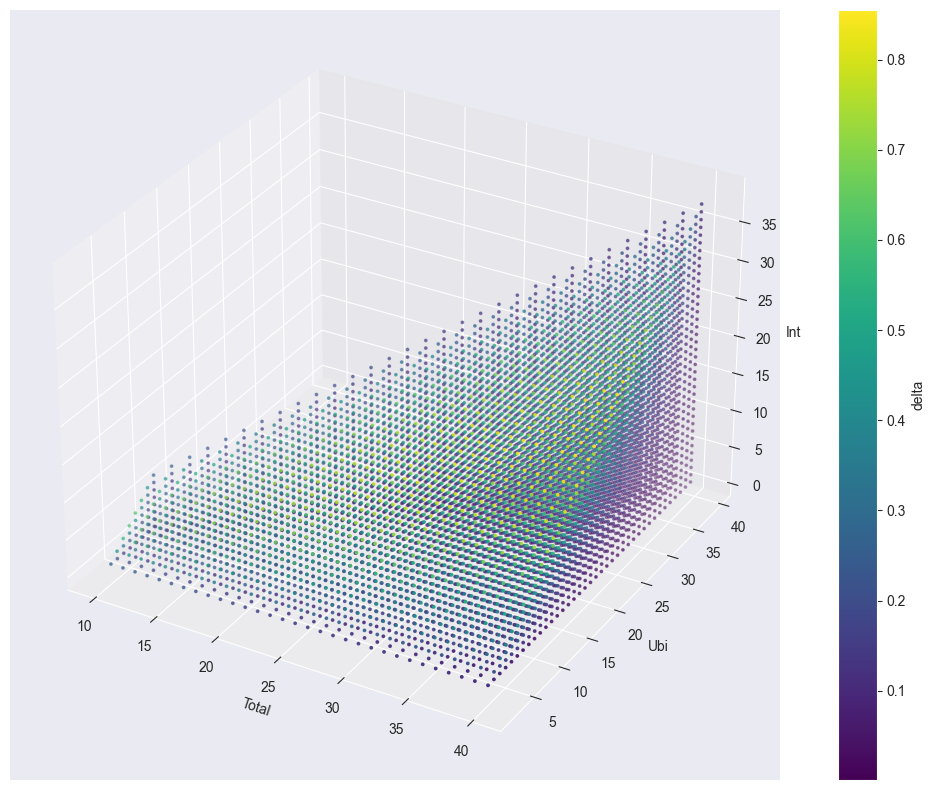

In [28]:
import math
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Define the range for total number of applications
num_min = 10
num_max = 40

# Initialize lists to store data
n_total_app = []
n_Ubi_app = []
n_Int_app = []
H_Ubi_app = []
H_Int_app = []
H_Ubi_Int_app = []
delta_app = []

# Function to calculate entropy
def h(p):
    return - p * math.log(p, 2) - (1 - p) * math.log((1 - p), 2)

# Finction to calculate overlap: I(Int|Ubi)
def hc(i, j, k):
    return h((k / j)) * (j / i)

# Populate the lists with data
for i in range(num_min, num_max + 1):
    for j in range(1, i):
        for k in range(1, j):
            n_total_app.append(i)
            n_Ubi_app.append(j)
            n_Int_app.append(k)
            H_Ubi_app.append(h(j / i))
            H_Int_app.append(h(k / i))
            H_Ubi_Int_app.append(hc(i, j, k))
            delta_app.append(h(k / i) - hc(i, j, k))

# Create DataFrame
n_total = pd.DataFrame(n_total_app, columns=['Total'])           
n_Ubi = pd.DataFrame(n_Ubi_app, columns=['Ubi'])
n_Int = pd.DataFrame(n_Int_app, columns=['Int'])
H_Ubi = pd.DataFrame(H_Ubi_app, columns=['Ubi_Ent'])
H_Int = pd.DataFrame(H_Int_app, columns=['Int_Ent'])
H_Ubi_Int = pd.DataFrame(H_Ubi_Int_app, columns=['Overlap_Ent'])
delta = pd.DataFrame(delta_app, columns=['delta'])

# Combine all data into a single DataFrame
d = pd.concat([n_total, n_Ubi, n_Int, H_Ubi, H_Int, H_Ubi_Int, delta], axis = 1, join = "inner")

# Plotting
sns.set_style("darkgrid")

X = d['Total']
Y = d['Ubi']
Z = d['Int']
C = d['delta']

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel("Total")
ax.set_ylabel("Ubi")
ax.set_zlabel("Int")


sc = ax.scatter(X, Y, Z, c=C, marker="o", s= 3, cmap = 'viridis')
plt.colorbar(sc, ax=ax, label='delta')

plt.show()

In [29]:
d.to_csv('Watabe_et_al_20240727.txt', sep='\t', index=True)